In [36]:
#импорт библиотек
import numpy as np
import pandas as pd 

In [37]:
#импорт данных, проверим их 
covid = pd.read_csv('Covid Data.csv')
print('Data Shape :', covid.shape)

Data Shape : (1048575, 21)


In [38]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [39]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [40]:
#кол-во уникальных значений
for col in covid.columns : 
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [41]:
#посмотрим, сколько пропущенных ячеек, если 97-99 -- пропущ. ячейки:
print('Процент пустых значений')
for col in covid.columns :
    print('{:<20} => {:>10.2f}%'.format(col, len(covid[(covid[col]==98) | (covid[col]==99) | (covid[col]==97)])/len(covid)*100))

Процент пустых значений
USMER                =>       0.00%
MEDICAL_UNIT         =>       0.00%
SEX                  =>       0.00%
PATIENT_TYPE         =>       0.00%
DATE_DIED            =>       0.00%
INTUBED              =>      81.62%
PNEUMONIA            =>       1.53%
AGE                  =>       0.03%
PREGNANT             =>      50.28%
DIABETES             =>       0.32%
COPD                 =>       0.29%
ASTHMA               =>       0.28%
INMSUPR              =>       0.32%
HIPERTENSION         =>       0.30%
OTHER_DISEASE        =>       0.48%
CARDIOVASCULAR       =>       0.29%
OBESITY              =>       0.29%
RENAL_CHRONIC        =>       0.29%
TOBACCO              =>       0.31%
CLASIFFICATION_FINAL =>       0.00%
ICU                  =>      81.64%


In [42]:
#исправим некоторые значения столбцов
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [43]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

In [44]:
#переведем небинарное значение в бинарное, т.е жив 2, умер 1
covid['DEATH'] = [2 if row=='9999-99-99' else 1 for row in covid['DATE_DIED']]

In [45]:
covid['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

In [46]:
# удалим практически пустые столбцы и неактуальный столбец по смертности
covid.drop(columns=['INTUBED','ICU','DATE_DIED'],inplace=True)

In [47]:
#посмотрим некорректные данные в столбце беременности, т.к для мужчин это значение пропущено
print('мужчины',covid.query('SEX==2')['PREGNANT'].value_counts(), sep='\n')
print('женщины',covid.query('SEX==1')['PREGNANT'].value_counts(), sep='\n')

мужчины
97    511936
Name: PREGNANT, dtype: int64
женщины
2     502200
1       7841
98      3175
Name: PREGNANT, dtype: int64


In [48]:
#заменим пустые значения отрицанием 
covid['PREGNANT'] = covid['PREGNANT'].replace(97,2)
covid['PREGNANT'] = covid['PREGNANT'].replace(98,2)

In [49]:
#рассмотрим результаты нашей подготовки данных
covid.shape

(1025152, 19)

In [50]:
# ширина изменилась с 1,048,575 до 1,025,152
# посмотрим, сколько уникальных значений стало в каждом столбце
for col in covid.columns : 
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
PNEUMONIA            =>          2
AGE                  =>        121
PREGNANT             =>          2
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
DEATH                =>          2


<AxesSubplot: title={'center': 'Возраст'}, xlabel='AGE', ylabel='Count'>

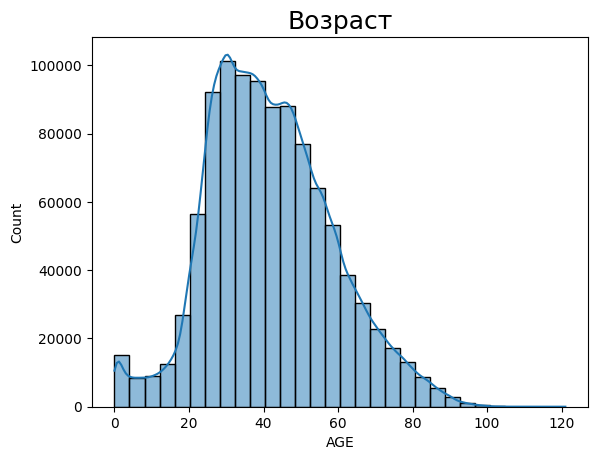

In [51]:
#посмотрим сводку по возрасту
import  matplotlib.pyplot as plt
import seaborn as sns

plt.title('Возраст', fontsize=18)
sns.histplot(data=covid, x=covid['AGE'],bins=30, kde=True)

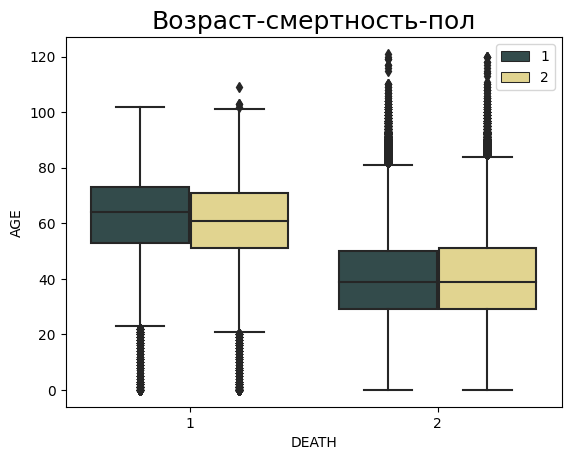

In [52]:
#посмотрим сводку соотношения возраста, пола и смертности 
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=covid,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Возраст-смертность-пол",fontsize=18)
plt.legend(loc="best")

Text(0.5, 1.0, 'Корреляция')

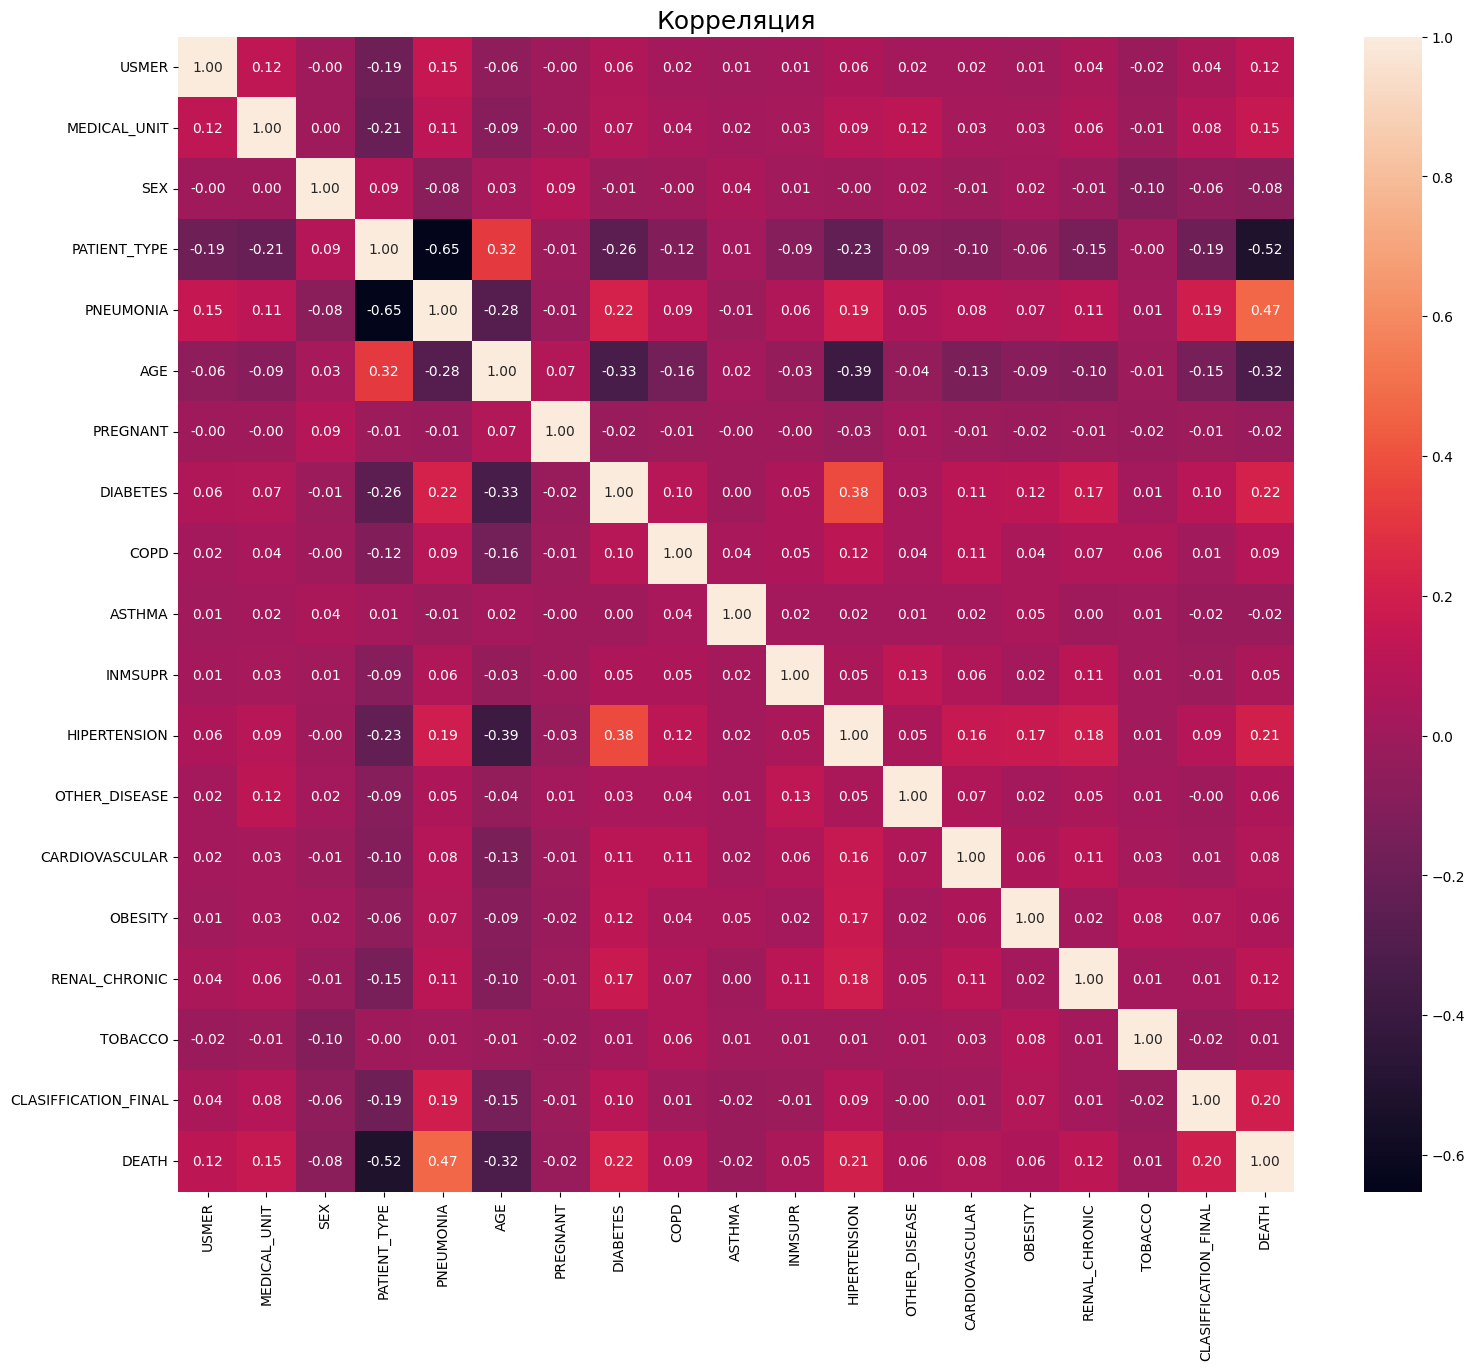

In [53]:
#посмотрим корреляцию факторов
plt.figure(figsize=(18,15))
sns.heatmap(covid.corr(), annot=True, fmt='.2f')
plt.title('Корреляция', fontsize=18)

In [54]:
#опустим факторы с отрицательной корреляцией со смерностью 
covid = covid.drop(columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"])



In [55]:
covid.to_csv('cov_fixed2.csv')

In [56]:
#переведем столбцы в фиктивные переменные, чтобы было проще с ними работать
covid = pd.get_dummies(covid,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [57]:
#масштабируем данные
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
covid.AGE = scaler.fit_transform(covid.AGE.values.reshape(-1,1))

In [58]:
#зададим переменные, где х - входные данные, у - целевой столбец
x = covid.drop(columns="DEATH")
y = covid["DEATH"]

In [59]:
#разабьем набор данных для обучения и тестирования и посмотрим размер
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (820121, 25)
Test_x : (205031, 25)
Train_y : (820121,)
Test_y : (205031,)


In [60]:
#проведем логистическую регрессию 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9400773541562008


c:\Users\annap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


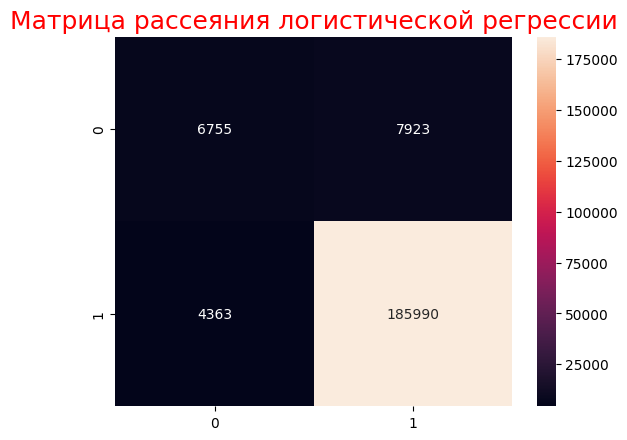

In [61]:
#найдем матрицу рассеивания 
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Матрица рассеяния логистической регрессии",fontsize=18, color="red");

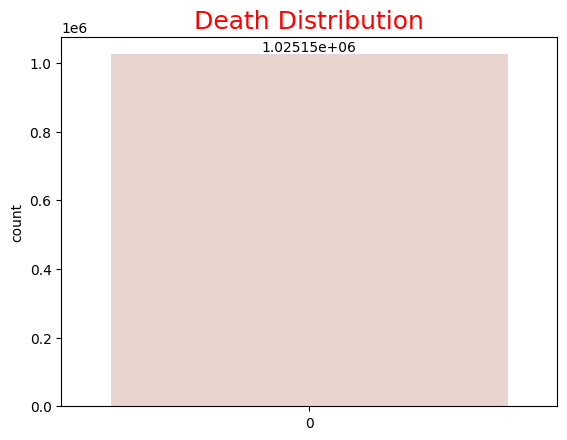

In [62]:
ax = sns.countplot(covid.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

In [63]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

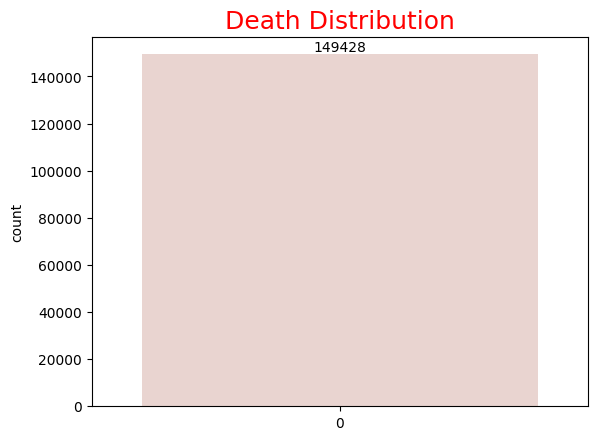

In [64]:
ax = sns.countplot(y_resampled, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

In [65]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (119542, 25)
Test_x : (29886, 25)
Train_y : (119542,)
Test_y : (29886,)


In [66]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9114970220169979


c:\Users\annap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


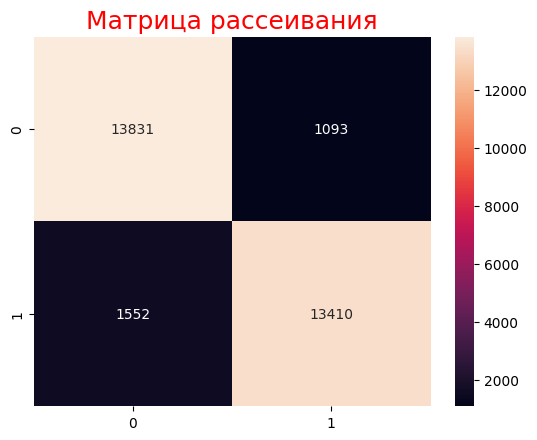

In [67]:
#построим новую матрицу рассеивания
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Матрица рассеивания",fontsize=18, color="red");

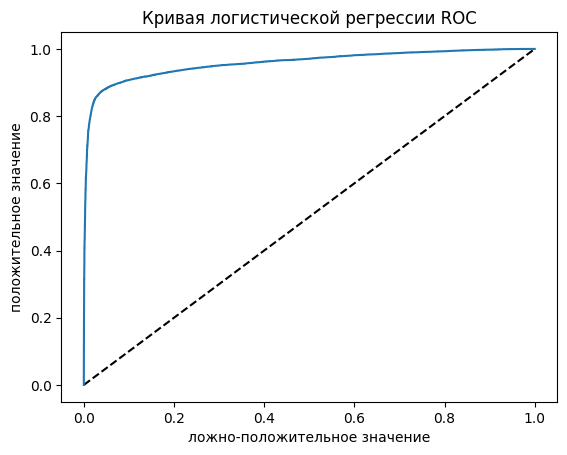

In [68]:
from sklearn.metrics import roc_curve
test_y = test_y.replace({2:1,1:0})
#вероятности
logreg_pred_proba = logreg.predict_proba(test_x)

fpr, tpr, thresholds = roc_curve(test_y, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "логистическая регрессия")
plt.xlabel("ложно-положительное значение")
plt.ylabel("положительное значение")
plt.title("Кривая логистической регрессии ROC")
plt.show()

In [69]:
import scipy
scipy.stats.shapiro(covid)

c:\Users\annap\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7602306604385376, pvalue=0.0)